Chapter 21
# 绘制交线
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import lambdify, diff, exp, latex
from sympy.abc import x, y
# 导入符号变量
# import os

from matplotlib import cm
# 导入色谱模块

# # 如果文件夹不存在，创建文件夹
# if not os.path.isdir("Figures"):
#     os.makedirs("Figures")

In [3]:
def mesh(num = 101):
    
    # number of mesh grids
    x_array = np.linspace(-3,3,num)
    y_array = np.linspace(-3,3,num)
    xx,yy = np.meshgrid(x_array,y_array)
    
    return xx, yy

### 1. 定义符号函数

In [4]:
# 用 sympy 库定义 MATLAB二元函数 peaks()
f_xy =  3*(1-x)**2*exp(-(x**2) - (y+1)**2)\
    - 10*(x/5 - x**3 - y**5)*exp(-x**2-y**2)\
    - 1/3*exp(-(x+1)**2 - y**2) 

f_xy_fcn = lambdify([x,y],f_xy)
# 将符号函数表达式转换为Python函数
xx, yy = mesh(num = 401)
f_xy_zz = f_xy_fcn(xx, yy)
# Reference: 
# https://www.mathworks.com/help/matlab/ref/peaks.html

### 2. 曲面和平面交线

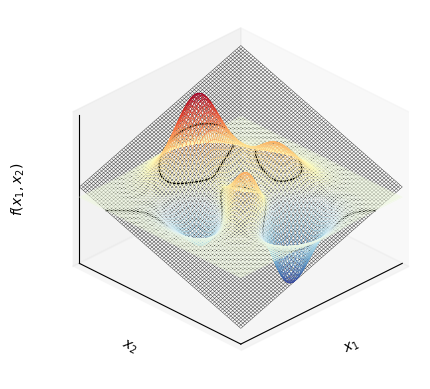

In [5]:
# x + y + 1 = 0
linear_eq = xx + yy + 1

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

gap = f_xy_zz - linear_eq
# 两个曲面之差

CS_x = ax.contour(xx,yy, gap, levels = [0],
           colors = '#339933')
# 两个曲面之差为0处，即交线位置
ax.cla()  
# 清空图片

norm_plt = plt.Normalize(f_xy_zz.min(), f_xy_zz.max())
colors = cm.RdYlBu_r(norm_plt(f_xy_zz))

surf = ax.plot_surface(xx,yy,f_xy_zz, 
                       facecolors=colors,
                       rstride=5, cstride=5,
                       linewidth=0.25, # 线宽
                       shade=False) # 删除阴影

surf.set_facecolor((0,0,0,0))

ax.plot_wireframe(xx,yy, linear_eq,
                  color = 'k',
                  rstride=5, cstride=5,
                  linewidth = 0.25)

# 分段绘制交线
for i in range(0,len(CS_x.allsegs[0])):

    contour_points_x_y = CS_x.allsegs[0][i]
    
    contour_points_z = f_xy_fcn(contour_points_x_y[:,0],
                                contour_points_x_y[:,1])
    
    
    ax.plot3D(contour_points_x_y[:,0],
              contour_points_x_y[:,1], 
              contour_points_z,
              color = 'k',
              linewidth = 1)
    

ax.set_proj_type('ortho')

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1,x_2)$')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax.view_init(azim=-135, elev=30)

ax.grid(False)
# fig.savefig('Figures/曲面和平面交线_3D.svg', format='svg')


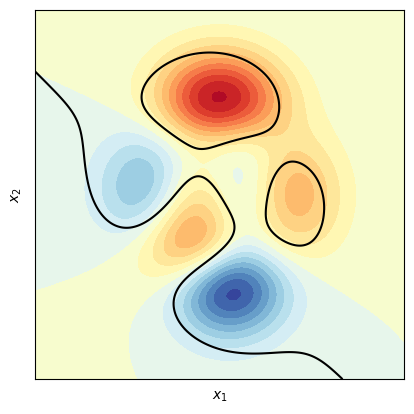

In [7]:
fig, ax = plt.subplots()

colorbar = ax.contourf(xx,yy, f_xy_zz, 20, cmap='RdYlBu_r')

ax.contour(xx,yy, gap,
           levels = [0],
           colors = 'k')

# fig.colorbar(colorbar, ax=ax)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

plt.gca().set_aspect('equal', adjustable='box')
# fig.savefig('Figures/曲面和平面交线_平面.svg', format='svg')

In [7]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023